In [82]:
import pandas as pd
df = pd.read_csv("/content/Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Do experiment!

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [84]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [85]:
type(df)

pandas.core.frame.DataFrame

In [86]:
df.shape

(60, 2)

In [87]:
df.dtypes

,0
area,int64
rent,int64


In [88]:
df.isnull().sum()

,0
area,0
rent,0


In [89]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


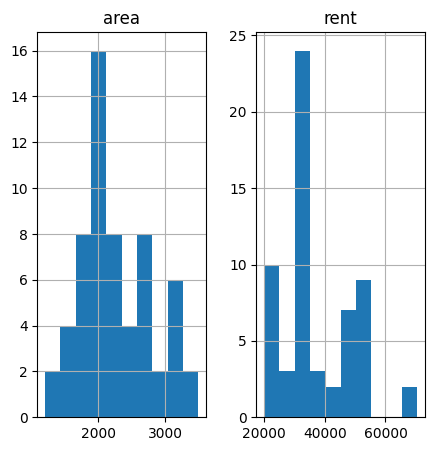

In [90]:
df.hist(bins=10, figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'Area(SQFT) VS Rent(BDT) in Dhaka')

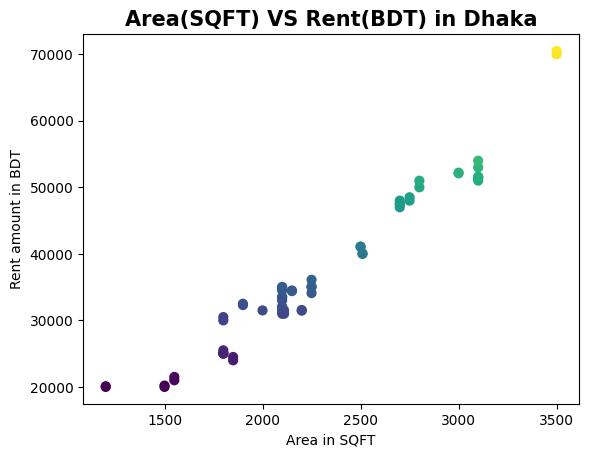

In [91]:
plt.scatter(df['area'],
            df['rent'],
            c=df['rent'],
            cmap= 'viridis' ,
            s=40,
            )

plt.xlabel('Area in SQFT', fontsize=10)
plt.ylabel('Rent amount in BDT',fontsize=10)
plt.title('Area(SQFT) VS Rent(BDT) in Dhaka',fontsize=15, weight='bold')

In [92]:
# Linear Regression

x = df['area']
y = df['rent']

dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

m = np.sum(dev_x * dev_y)/ np.sum(dev_x**2)

c = np.mean(y) - (m*np.mean(x))

In [93]:
m

np.float64(21.292661473611954)

In [94]:
c

np.float64(-11469.7354464311)

In [95]:
df.head(5)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [96]:
# y = mx + c

y1 = 21.29 * 2000 + (-11469.73)
y2 = 21.29 * 2100 + (-11469.73)
y3 = 21.29 * 2500 + (-11469.73)
y4 = 21.29 * 2250 + (-11469.73)
y5 = 21.29 * 3000 + (-11469.73)

print(f"1st pred. = {y1} , 2nd pred. = {y2}, 3rd pred. = {y3}, 4th pred. = {y4}, 5th pred. = {y5}")

1st pred. = 31110.27 , 2nd pred. = 33239.270000000004, 3rd pred. = 41755.270000000004, 4th pred. = 36432.770000000004, 5th pred. = 52400.270000000004


In [97]:
lin_reg = LinearRegression()

lin_reg.fit(df[['rent']], y)
predictedValue = lin_reg.predict(df[['rent']])

predictedValue

array([31500., 35000., 41050., 36100., 52100., 32500., 20000., 24500.,
       48000., 31000., 34500., 32000., 34500., 40050., 34100., 51500.,
       30500., 21000., 25000., 47000., 31500., 33500., 70000., 20000.,
       50000., 53000., 48000., 25000., 31460., 51400., 33500., 35010.,
       41100., 35100., 52200., 32300., 20200., 24000., 47500., 31500.,
       34400., 32020., 34700., 40000., 35000., 51000., 30000., 21500.,
       25500., 47500., 31000., 33000., 70500., 20100., 51000., 54000.,
       48500., 25100., 31560., 51600.])

In [98]:
df2 = df.copy()
df2['Predicted_Value'] = predictedValue
df2.head()

,area,rent,Predicted_Value
0,2000,31500,31500.0
1,2100,35000,35000.0
2,2500,41050,41050.0
3,2250,36100,36100.0
4,3000,52100,52100.0
